In [11]:
import pandas as pd

In [12]:
data = pd.read_csv('domestic_violence.csv')

In [13]:
data.head()

,Unnamed: 0,Unnamed: 0.1,title,score,id,subreddit,url,num_comments,body,created
0,0,0,[serious] heads up kinda controversial: As muc...,1,fk8nn7,gender,https://www.reddit.com/r/gender/comments/fk8nn...,2,\n\nAs much stated above. I am not saying we ...,1.584493e+09
1,1,1,The Top 10 most ridiculous bias complaints The...,0,ei4hnj,gender,https://www.reddit.com/r/gender/comments/ei4hn...,0,# The Top 10 most ridiculous bias complaints T...,1.577836e+09
2,2,2,Survey for IAPS,2,admmpa,gender,https://www.reddit.com/r/gender/comments/admmp...,2,If you all could take this 2 minute survey on ...,1.546926e+09
3,3,3,Reporting gender based violence: A handbook fo...,2,ambz7,gender,http://sexgenderbody.com/content/reporting-gen...,0,NaN,1.262828e+09
4,4,4,Involve men to check violence against women,1,c0lmx,gender,http://www.citizen-news.org/2010/05/involve-me...,0,NaN,1.273185e+09


In [14]:
data1 = data.drop(columns=['score','id','subreddit','url','num_comments','created'])

In [15]:
data1= data1.dropna()

In [16]:
data1.head()

,Unnamed: 0,Unnamed: 0.1,title,body
0,0,0,[serious] heads up kinda controversial: As muc...,\n\nAs much stated above. I am not saying we ...
1,1,1,The Top 10 most ridiculous bias complaints The...,# The Top 10 most ridiculous bias complaints T...
2,2,2,Survey for IAPS,If you all could take this 2 minute survey on ...
5,5,5,The Spectacle that is Jenner,By Helen Hill MA MFT\n\nThe “celebration” of C...
6,6,6,Study on transgender individuals' experiences ...,"Hello,\nMy name is Laurel Watson, and I am an ..."


In [17]:
import re
# Remove punctuation
data1['body_processed']= data1['body'].map(lambda x: re.sub('[,\.!?]', '', str(x)))
data1['body_processed'] = data1['body'].map(lambda x: str(x).lower())


In [18]:
data1['body_processed'].head()

0     \n\nas much stated above. i am not saying we ...
1    # the top 10 most ridiculous bias complaints t...
2    if you all could take this 2 minute survey on ...
5    by helen hill ma mft\n\nthe “celebration” of c...
6    hello,\nmy name is laurel watson, and i am an ...
Name: body_processed, dtype: object

In [21]:
data1['body_processed']

0        \n\nas much stated above. i am not saying we ...
1       # the top 10 most ridiculous bias complaints t...
2       if you all could take this 2 minute survey on ...
5       by helen hill ma mft\n\nthe “celebration” of c...
6       hello,\nmy name is laurel watson, and i am an ...
                              ...                        
1364    i was in a relationship with someone who i lov...
1365    long story. i'm a 26 year old male. i've been ...
1366    tl;dr how do i tell my female friend she might...
1367    i was raped for several years when i was a chi...
1368    people of reddit: i am working on a project di...
Name: body_processed, Length: 645, dtype: object

In [22]:
from wordcloud import WordCloud


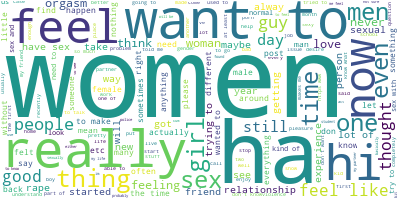

In [23]:
long_string = ','.join(list(data1['body_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [26]:
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

In [27]:
count_vectorizer = CountVectorizer(stop_words='english')

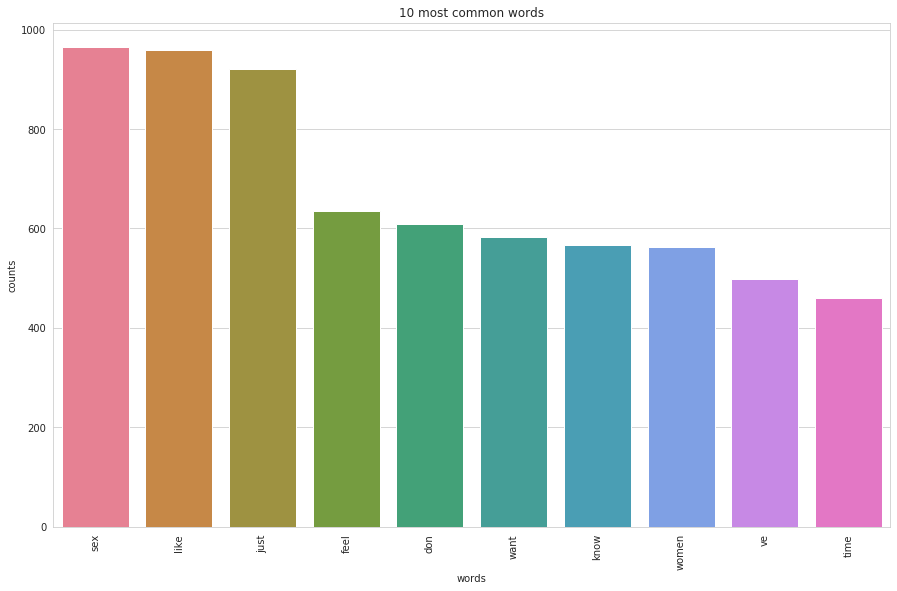

In [28]:
count_data = count_vectorizer.fit_transform(data1['body_processed'])
plot_10_most_common_words(count_data, count_vectorizer)

In [29]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

In [30]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [31]:
number_topics = 5
number_words = 10

In [32]:
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [33]:
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
com https delhi twitter rape status maritalrape girls wife sexual

Topic #1:
women day https india violence home www com kid men

Topic #2:
sex just like don know want time women ve feel

Topic #3:
https com people police india www indian violence students women

Topic #4:
like feel just sex don want ve know really women


In [34]:
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os

In [35]:
LDAvis_data_filepath = os.path.join('./domestic_vio'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath,'rb') as f:
    LDAvis_prepared = pickle.load(f)
    pyLDAvis.save_html(LDAvis_prepared, './domestic_vio'+ str(number_topics) +'.html')

/home/dipesh/.local/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
